In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Hackathon_working_data dataset
dataset_path = 'Hackathon_Working_Data.csv'
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB
None


In [ ]:
# Display descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


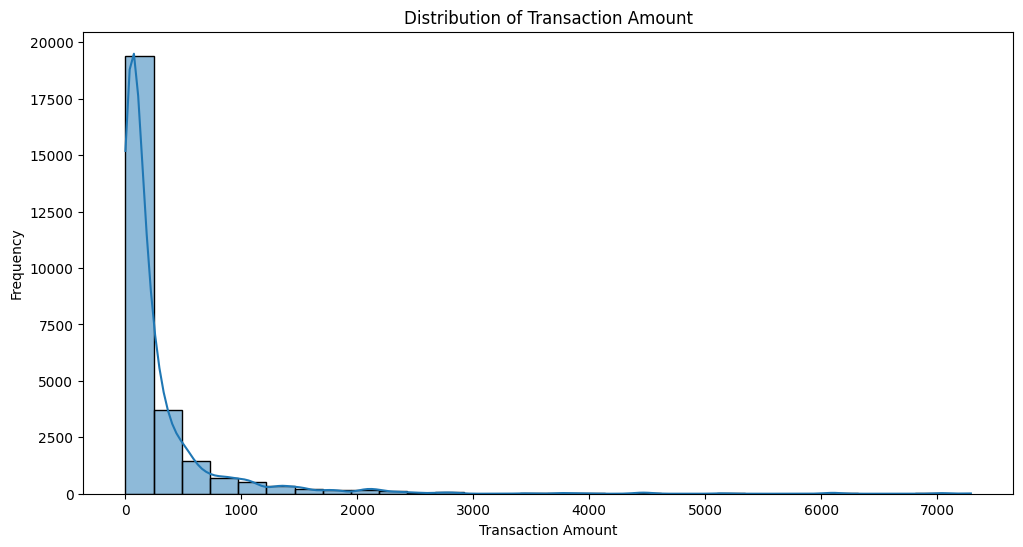

In [ ]:
# Explore the distribution of TransactionAmount
plt.figure(figsize=(12, 6))
sns.histplot(df['BILL_AMT'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analyze total transaction amount per customer
total_transaction_per_customer = df.groupby('BILL_ID')['BILL_AMT'].sum().reset_index()


In [ ]:
# Analyze the number of transactions per customer
num_transactions_per_customer = df.groupby('BILL_ID')['BILL_AMT'].count().reset_index()
num_transactions_per_customer.rename(columns={'BILL_AMT': 'NumTransactions'}, inplace=True)


In [ ]:
# Merge the two dataframes
customer_data = pd.merge(total_transaction_per_customer, num_transactions_per_customer, on='BILL_ID')


In [ ]:
# Display customer behavior data
print("\nCustomer Behavior Data:")
print(customer_data.head())


Customer Behavior Data:
  BILL_ID  BILL_AMT  NumTransactions
0      T1   3041.50               10
1     T10   4504.00               13
2    T100   1628.64                8
3   T1000    505.00                5
4   T1001   4225.38               15


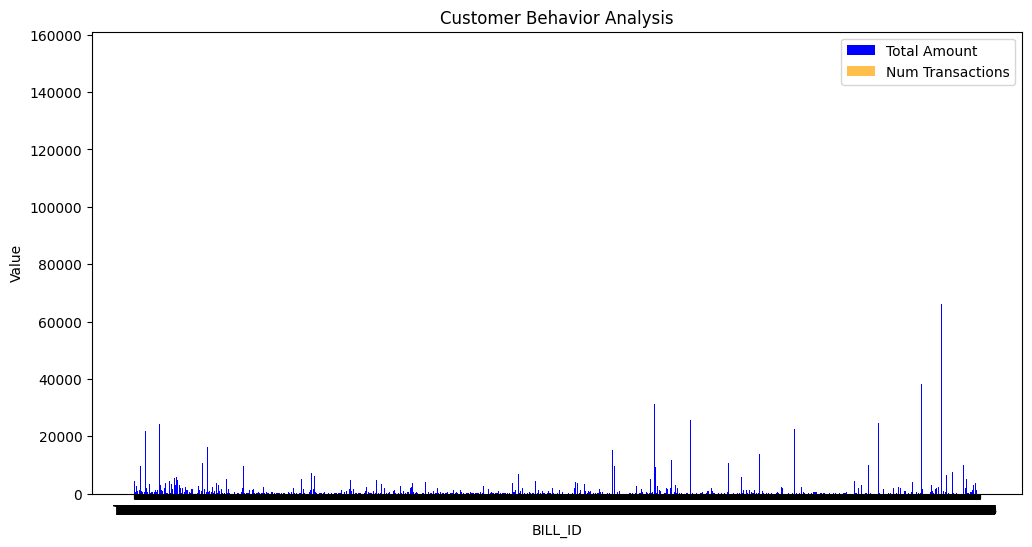

In [ ]:
# Visualize customer behavior
plt.figure(figsize=(12, 6))
plt.bar(customer_data['BILL_ID'], customer_data['BILL_AMT'], color='blue', label='Total Amount')
plt.bar(customer_data['BILL_ID'], customer_data['NumTransactions'], color='orange', label='Num Transactions', alpha=0.7)
plt.xlabel('BILL_ID')
plt.ylabel('Value')
plt.title('Customer Behavior Analysis')
plt.legend()
plt.show()